In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_Temperature_Data.csv')

In [3]:
df.head(10)

,Date,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,4.384,2.294,Åland
2,1744-01-01,4.384,2.294,Åland
3,1744-02-01,4.384,2.294,Åland
4,1744-03-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,15.342,1.410,Åland


In [4]:
df.shape

(577462, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           577462 non-null  object 
 1   AverageTemperature             577462 non-null  float64
 2   AverageTemperatureUncertainty  577462 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
#Convert date column to Datetime.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           577462 non-null  datetime64[ns]
 1   AverageTemperature             577462 non-null  float64       
 2   AverageTemperatureUncertainty  577462 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [8]:
#Show unique Countries
unique_countries = list(df['Country'].unique())
unique_countries.sort()
print(len(unique_countries))
print(unique_countries)

243
['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire", 'Denmark', 'Denmark (Europe)', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe', 'Falkland Islands (I

In [9]:
sorted_temps = df.groupby(['Country']).mean().sort_values(by='AverageTemperature',ascending=False)

In [10]:
sorted_temps

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Antarctica,29.235000,0.957982
Djibouti,28.424568,0.905027
Mali,28.227816,0.833667
Burkina Faso,27.953593,0.770594
Senegal,27.849829,0.786131
...,...,...
Canada,-2.924743,1.559316
Russia,-5.600145,1.095811
Svalbard And Jan Mayen,-7.497516,2.992219


<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

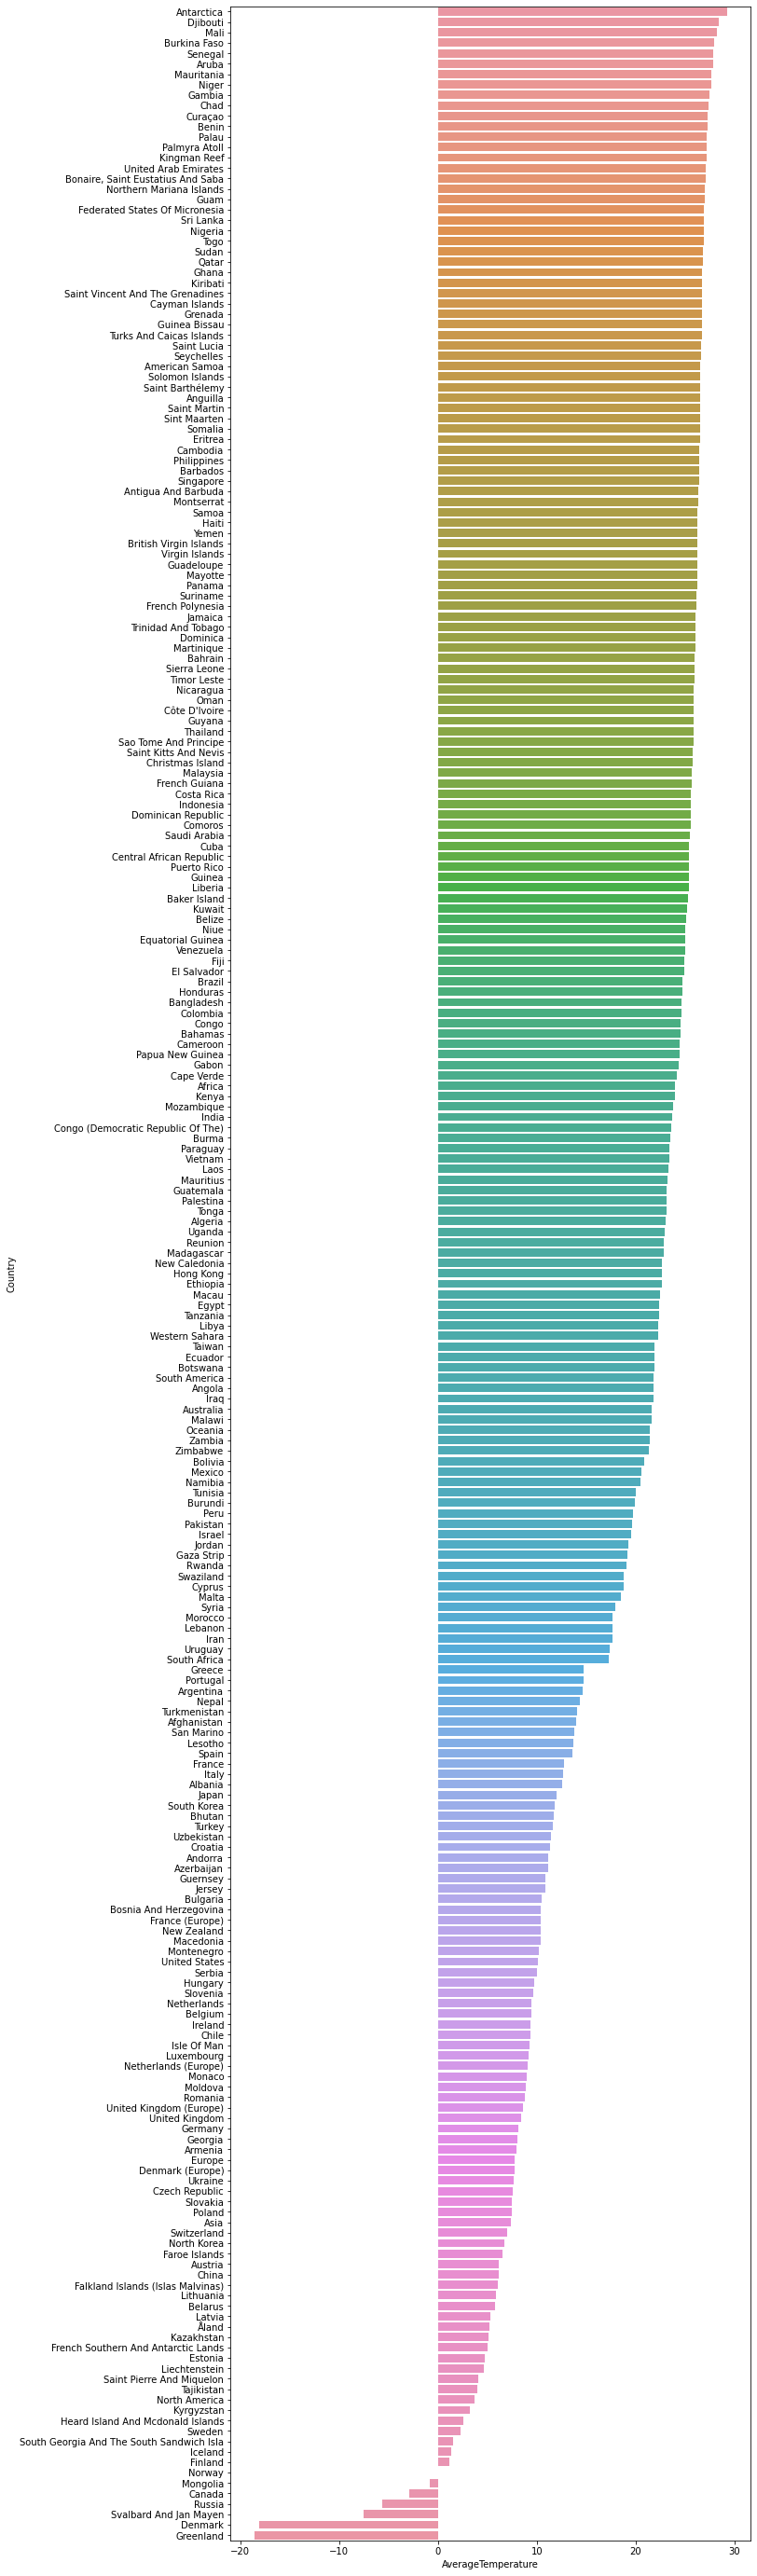

In [11]:
f, ax = plt.subplots(figsize=(10,50))

sns.barplot(x='AverageTemperature',y=sorted_temps.index,data=sorted_temps)

In [12]:
years = df['Date'].dt.to_period('Y')

years

0         1743
1         1743
2         1744
3         1744
4         1744
          ... 
577457    2013
577458    2013
577459    2013
577460    2013
577461    2013
Name: Date, Length: 577462, dtype: period[A-DEC]

In [14]:
#Won't work with datetime dtype

#year_test = np.unique(df['Date'].apply(lambda x: x[:4]))

#year_test